# Plot of SST for S-MODE IOP1



In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import copy

import cartopy.crs as ccrs                   # import projections
from cartopy.io.shapereader import Reader
import cartopy
import gsw
import functions  # requires functions.py from this repository
import datetime

import sys
sys.path.insert(0,'../../NASA_SMODE/DataSynthesis/tools') #github repo in NASA_SMODE organization
sys.path.insert(0,'../../NASA_SMODE/DataSynthesis/data-synthesis/')
# from mapping_tools import *
# from tools import *

In [2]:
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 600
#plt.close('all')

%matplotlib inline
%matplotlib widget
# %matplotlib qt5

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [3]:
f = gsw.geostrophy.f(37)
inertial_period = 2*np.pi/f/3600
print('Inertial period is '+ f'{inertial_period:.1f}' + ' hours')

Inertial period is 19.9 hours


In [4]:
# 2022 IOP
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20220921T101000Z.nc'; V = [14, 16]; zoom = 1 #
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20220921T101000Z.nc'; V = [14, 18]; zoom = 1 #
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/MODIS_Aqua/MODIS_Aqua_20221019T102002Z.nc'; V = [15, 16]; zoom = 3 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/MODIS_Aqua/MODIS_Aqua_20221019T102002Z.nc'; V = [14, 18]; zoom = 1 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPC/AVHRR_METOPC_20221021T175000Z.nc';V = [14, 20]; zoom = 3 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221021T184000Z.nc';V = [15,19]; zoom = 2 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221023T053000Z.nc';V = [14,20]; zoom = 1 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221023T101000Z.nc';V = [12,19]; zoom = 1 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221023T101000Z.nc';V = [14,19]; zoom = 4 
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221023T175000Z.nc';V = [14,19]; zoom = 3 
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPC/AVHRR_METOPC_20221023T185000Z.nc';V = [14,19]; zoom = 4
#very good 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221023T213000Z.nc';V = [14,19]; zoom = 4
# Nice 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221023T213000Z.nc';V = [12,19]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221023T213000Z.nc';V = [11.5,19.5]; zoom = 1

url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/MODIS_Aqua/MODIS_Aqua_20221019T102002Z.nc'; V = [14, 18]; zoom = 1 

# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221024T051000Z.nc';V = [14,19]; zoom = 4
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221024T051000Z.nc';V = [12,19]; zoom = 1
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/Sentinel_3A/Sentinel_3A_20221024T055416Z.nc';V = [13.5,19.5]; zoom = 2
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221023T213000Z.nc';V = [13.5,19.5]; zoom = 2

'''
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/Sentinel_3B/Sentinel_3B_20221026T060344Z.nc';V = [13,19]; zoom = 4

url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221026T183000Z.nc';V = [13,19]; zoom = 4

url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPC/AVHRR_METOPC_20221026T174000Z.nc';V = [13,19]; zoom = 4
'''
#good url ='http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221026T204000Z.nc';V = [12,19]; zoom = 1
#goodurl ='http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221026T204000Z.nc';V = [14,19]; zoom = 4
# url ='http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPC/AVHRR_METOPC_20221027T050000Z.nc';V = [13,19]; zoom = 4
# url ='http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221027T055000Z.nc';V = [13,19]; zoom = 4
#ok, slack front url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221027T104000Z.nc';V = [13,19]; zoom = 4

#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221027T181000Z.nc';V = [14,19]; zoom = 4
#ok url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221027T181000Z.nc';V = [12,19]; zoom = 1
#good url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221029T051000Z.nc';V = [14,19]; zoom = 4 # V = [12,19]; zoom = 1

#good 
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221029T100000Z.nc'; V = [12,19.5]; zoom = 0
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221029T051000Z.nc'; V = [14,19]; zoom = 4

# url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221030T210000Z.nc'; V = [12,19]; zoom = 0
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221102T102000Z.nc'; V = [14,19]; zoom = 4



"\nurl = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/Sentinel_3B/Sentinel_3B_20221026T060344Z.nc';V = [13,19]; zoom = 4\n\nurl = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPB/AVHRR_METOPB_20221026T183000Z.nc';V = [13,19]; zoom = 4\n\nurl = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/AVHRR_METOPC/AVHRR_METOPC_20221026T174000Z.nc';V = [13,19]; zoom = 4\n"

In [5]:
time_window = 20
zoom_str = 'zoom' + str(zoom)

In [6]:
# Flags/options
plot_SWOT = True
plot_assets = False
savefig = True

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:256: Sh

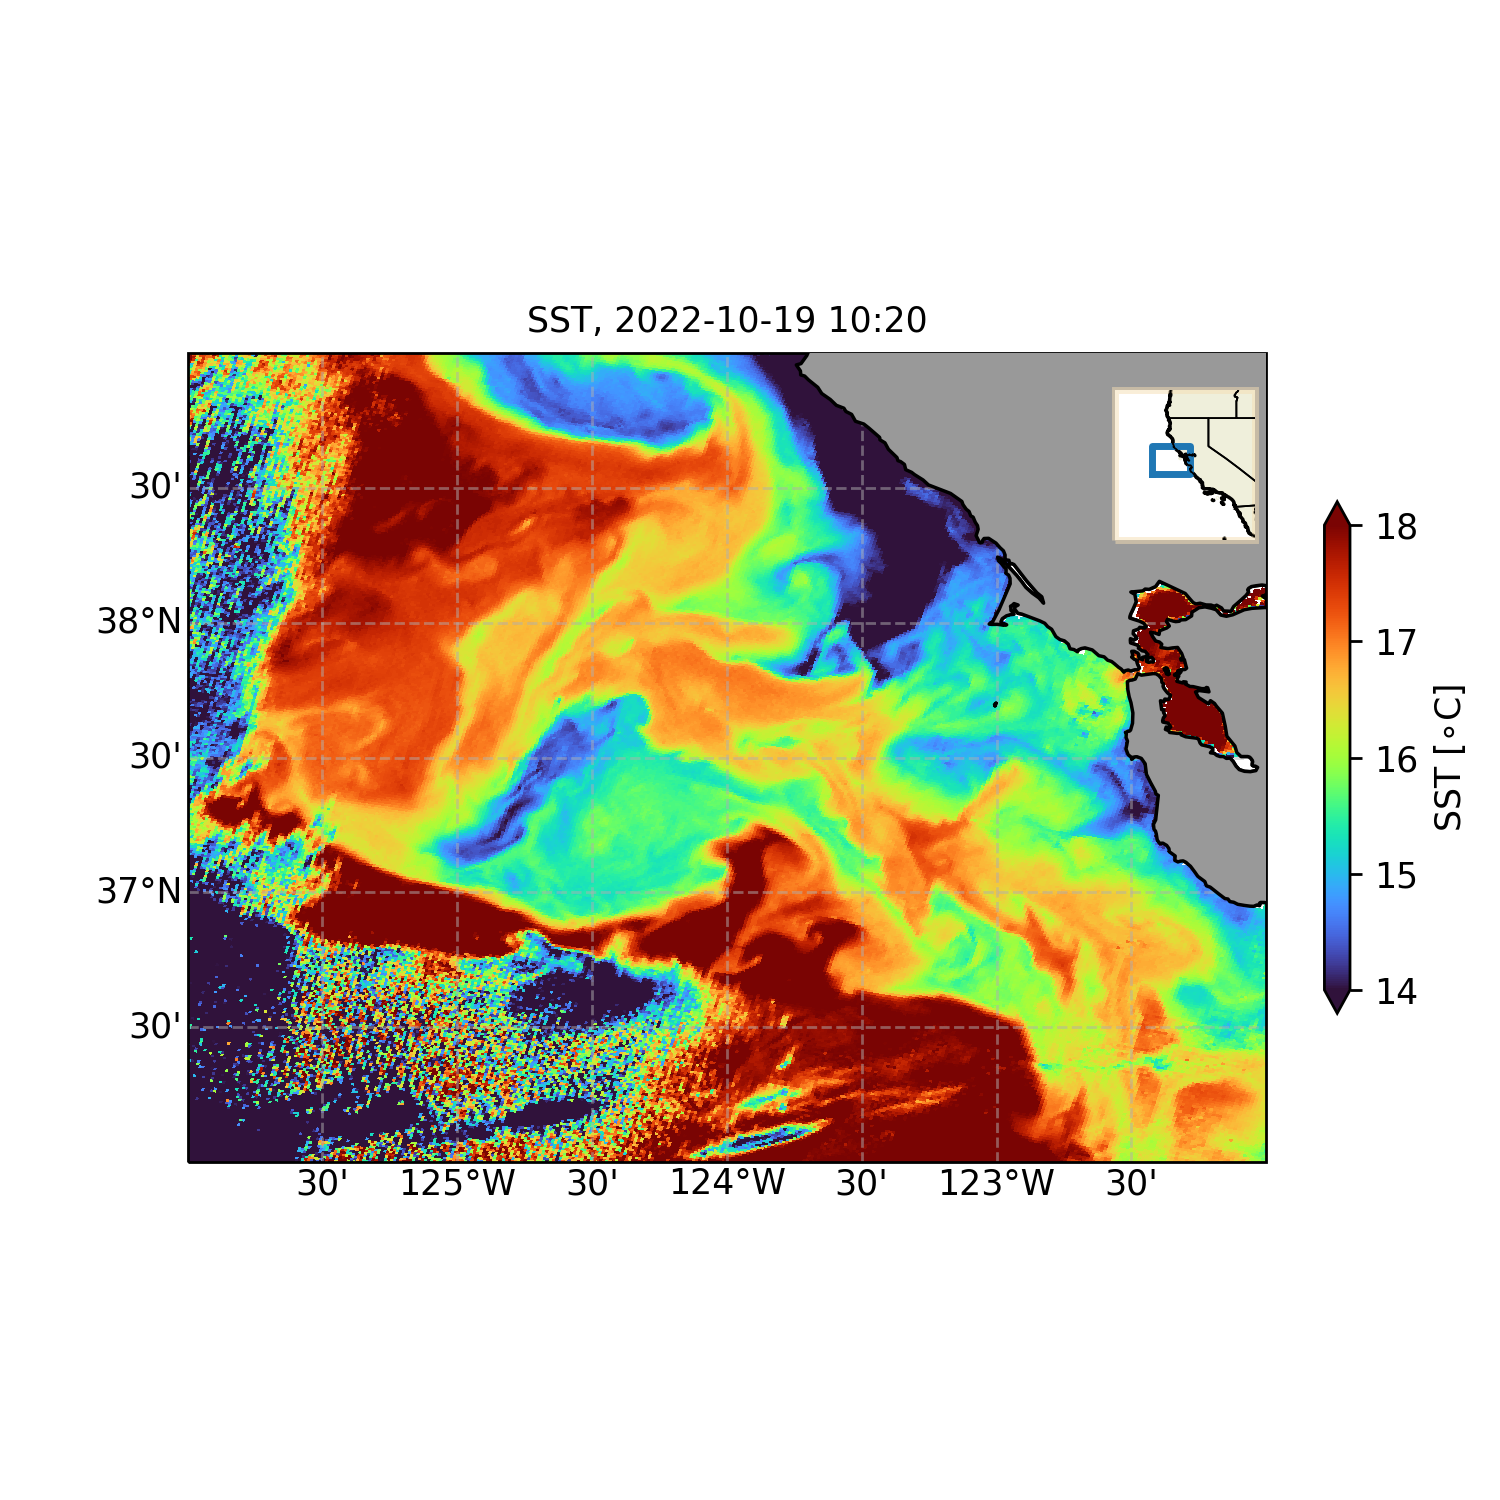

In [7]:
(ax, day_str) = functions.sst_map_SMODE(url,zoom,V,time_window)

In [8]:
# If doing this in real time, it can be relevant to plot current postions of assets
# If not real-time, it is not relevant
'''
sd = functions.get_current_position('saildrone')
ax.scatter(sd.longitude,sd.latitude,s=5,c='k',transform=ccrs.PlateCarree())
wg = functions.get_current_position('waveglider')
ax.scatter(wg.longitude,wg.latitude,s=5,c='m',transform=ccrs.PlateCarree())
''';

In [9]:

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -124.25
y0 = 36.75
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+2/60, y0-.5/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())


/tmp/ipykernel_305/860082255.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')


Text(-124.21666666666667, 36.74166666666667, '10 km')

In [10]:
if savefig:
    plt.savefig(__figdir__+'SST_assets2_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


In [11]:
file = '../data/external/aviso2.nc'
ssh = xr.open_dataset(file)

In [12]:
tind = np.flatnonzero(np.abs(ssh.time-np.datetime64(day_str))==np.min(np.abs(ssh.time-np.datetime64(day_str))))

In [13]:
ssh.time[tind]

<xarray.DataArray 'time' (time: 1)>
array(['2022-10-19T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-10-19
Attributes:
    axis:                 T
    long_name:            Time
    standard_name:        time
    _ChunkSizes:          1
    _CoordinateAxisType:  Time
    valid_min:            26555.0
    valid_max:            26597.0

In [14]:
scale = 5
#tind = -1
u = np.squeeze(ssh.ugos.isel(time=tind)) #dtype=object
v = np.squeeze(ssh.vgos.isel(time=tind))
Qgeo = ax.quiver(ssh.longitude.values,ssh.latitude.values, u.values, v.values,  scale_units='width', scale = scale, transform=ccrs.PlateCarree())
functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k')


((-125.538656,
  -126.244555,
  -125.438469,
  -123.994657,
  -123.383396,
  -122.922778,
  -125.538656),
 (35.790897, 38.182585, 38.113294, 37.711709, 37.795817, 36.99869, 35.790897),
 <GeoAxesSubplot:title={'center':'SST, 2022-10-19 10:20'}>)

In [15]:
__figdir__

'../plots/'

In [16]:
Qgeo

In [17]:
## Add WG velocity vector

In [18]:
t0 = np.datetime64(day_str)
tmin = t0 - np.timedelta64(30,'m')#np.datetime64('now')
tmax = t0 + np.timedelta64(30,'m')#np.datetime64('now')
z0 = -4
skip = 1
width = Qgeo.width
headwidth = Qgeo.headwidth
headlength = Qgeo.headlength
headaxislength = Qgeo.headaxislength

In [19]:
# Function to plot WG position and vel at time of SST image
def plot_WG_vel_vectors(ax,tmin,tmax,scale,skip, **kwargs):
    # List of WGs
    WG_list = ['WHOI32','WHOI22','WHOI43','STOKES', 'PLANCK', 'PASCAL', 'CARSON'] #leave Kelvin out because of ADCP problem in IOP1
    path='../data/raw/WG_NRT/'
    # Read in cleaned ADCP files from all WG
    n=0
    for WG in WG_list:
        file = path+'adcp_'+WG+'.nc'
        varstr = 'adcp_'+WG
        ds=xr.open_dataset(file,decode_times=True) #Time and z already fixed in WG_realtime_cleanup.ipynb
        tind = np.flatnonzero(np.logical_and(ds.time>tmin,ds.time<tmax))
        tind=tind[0:-1:skip]
        zind = np.flatnonzero(np.abs(ds.depth-z0)==np.min(np.abs(ds.depth-z0)))
        if tind.size==0:
            print('Skipping '+WG)
            continue
        else:
            Q = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[zind, tind].values),np.squeeze(ds.current_north[zind, tind].values),scale_units='width',scale=scale,transform=ccrs.PlateCarree(),**kwargs)
            ax.scatter(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,s=5,color='k',transform=ccrs.PlateCarree())
            qk = ax.quiverkey(Q, 0.1, 0.75, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


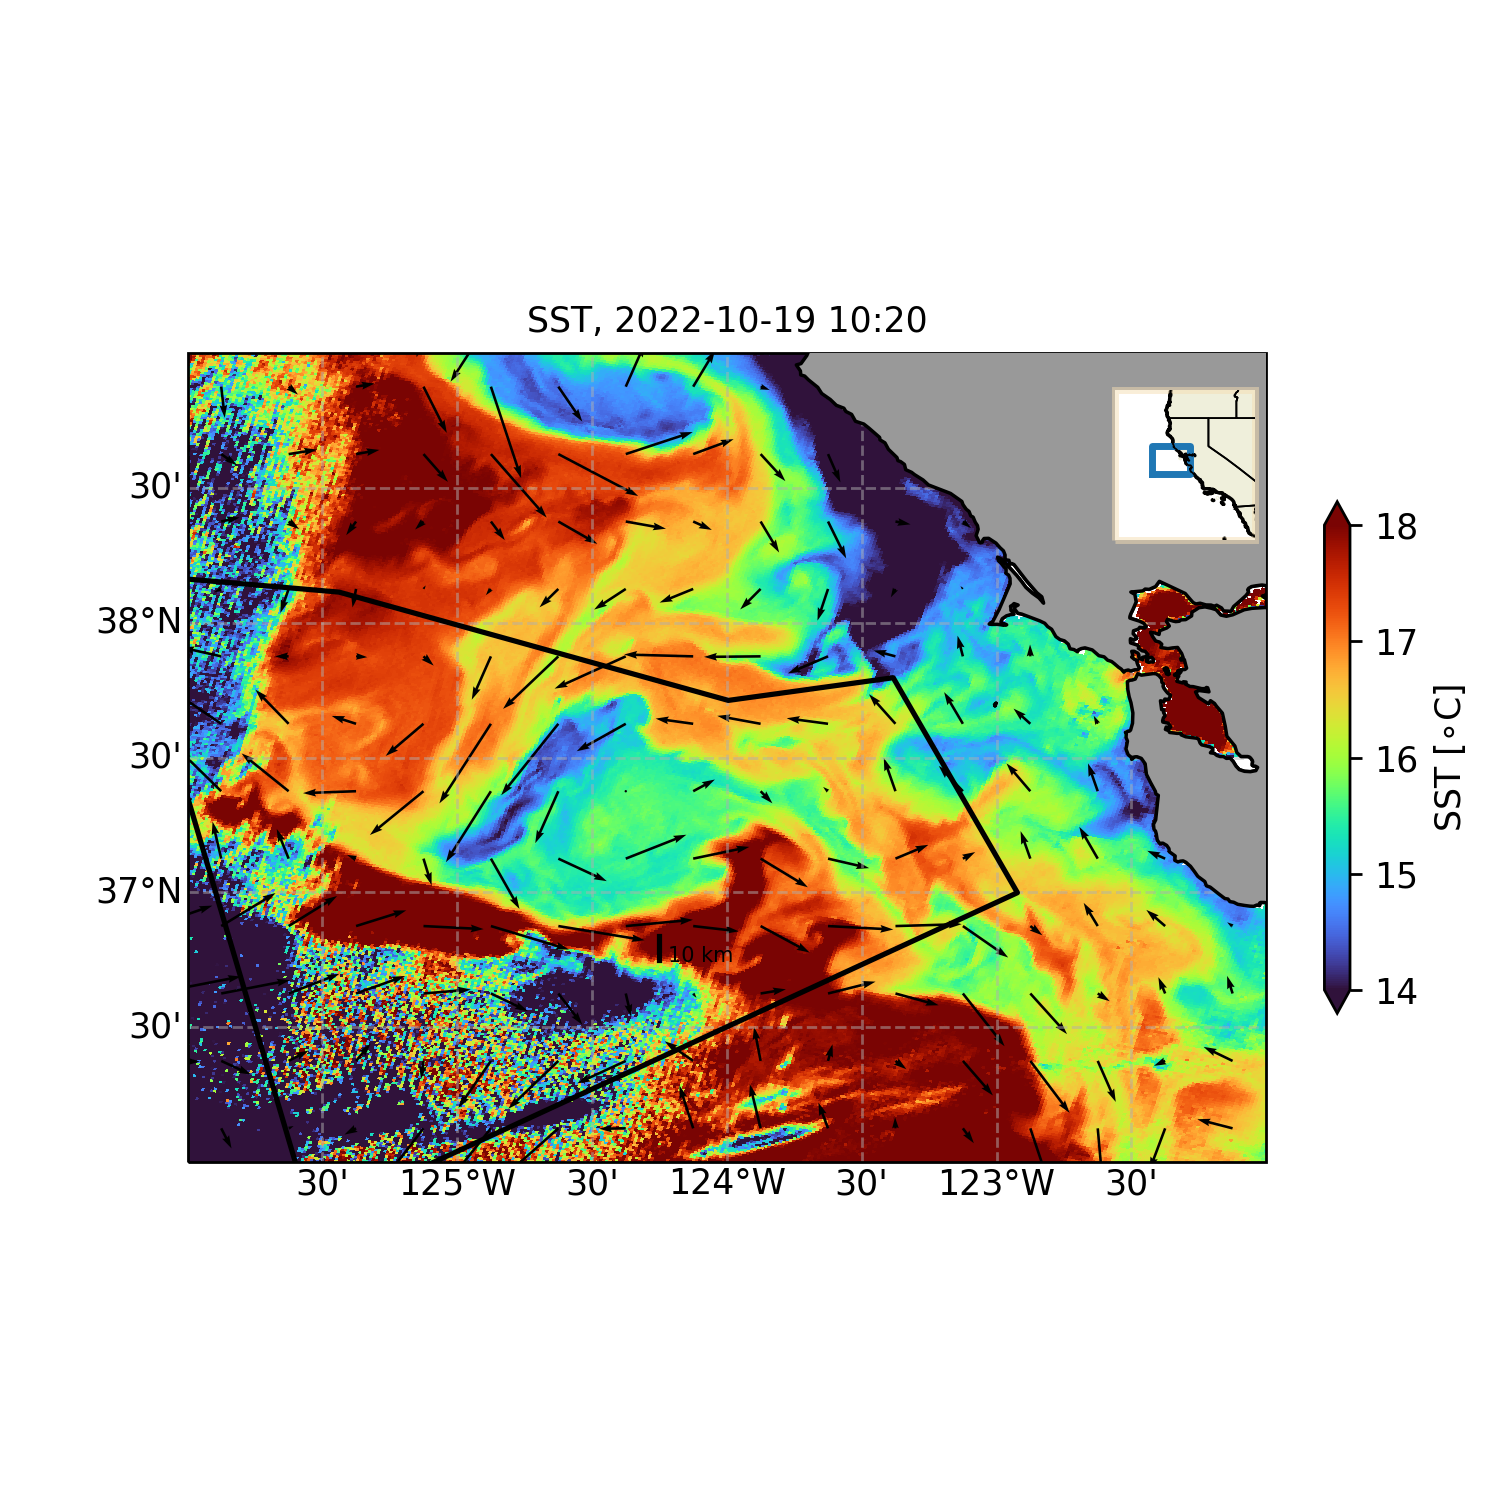

In [20]:
plt.show()

In [21]:
if savefig:
    plt.savefig(__figdir__+'SST_UV_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

In [22]:
if plot_assets:
    plot_WG_vel_vectors(ax,tmin,tmax,scale,skip,color='grey',edgecolor='k', linewidth = 1, width = width, headlength = headlength, headwidth = headwidth, headaxislength = headaxislength)
    if savefig:
        plt.savefig(__figdir__+'SST_UV_WG_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

In [ ]:
# add SWOT cal/val swath
if plot_SWOT:
    swot_file = "../../SWOT/orbit/sph_calval_swath/swot_calval_orbit_june2015-v2_swath.shp"
    nadir_file = "../../SWOT/orbit/shp_calval_nadir/swot_calval_orbit_june2015-v2_nadir.shp"
    ax.add_geometries(Reader(swot_file).geometries(), ccrs.PlateCarree(), facecolor='white',alpha=0.45,edgecolor='k')
    ax.add_geometries(Reader(nadir_file).geometries(), ccrs.PlateCarree(), facecolor='k',edgecolor='k')
    functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k')
    plt.show()
    if savefig:
        plt.savefig(__figdir__+'SST_UV_SWOT_swath_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

In [24]:
assert False

AssertionError: 

# Now read in locations of in situ platforms

In [ ]:
BASE_URL = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/'

saildrones = {
    'type': 'sd',
    'ids': ['1072','1073','1062','1075','1074'],
    'URL': BASE_URL + 'saildrone/',
    'rename_database' : {
    'sbe37_practical_salinity_filtered': 'salinity',
    'sbe37_temperature_filtered': 'temperature',
    'water_velocity_east': 'u',
    'water_velocity_north': 'v',
    },
}

wavegliders = {
    'type': 'wg',
    'ids': ['KELVIN','STOKES','SV3'],
    'URL': BASE_URL + 'waveglider/',
    'rename_database': {
        'longitude_1hz_Avg': 'longitude',
        'latitude_1hz_Avg': 'latitude',
        'uctd_temp_Avg':  'temperature',
        'uctd_cond_Avg': 'conductivity',
    }
}

oceanus = {
    'type': 'RV',
    'ids': ['oceanus'],
    'URL': BASE_URL + 'Oceanus/',
    'rename_database':{
        'tsg_flth_temperature': 'temperature',
        'tsg_flth_salinity': 'salinity',
        'gnss_gga_bow_longitude': 'longitude',
        'gnss_gga_bow_latitude': 'latitude',
    }
}

In [ ]:
url_chl = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/Sentinel_3B/Sentinel_3B_20221021T185032Z.nc'
chl = xr.open_dataset(url_chl)

In [ ]:
chl

In [ ]:
fig = plt.figure()
plt.pcolor(chl.CHL_OC4ME,norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=1))

In [ ]:
if savefig:
    plt.savefig(__figdir__+'SST_UV_' + day_str2 + zoom_str + '_' + f'{time_window:.0f}' + 'hr' + '.' +plotfiletype,**savefig_args)